# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Mohamed
- **Email:** tahungak@gmail.com
- **ID Dicoding:** mohamed_pjzV

## Menentukan Pertanyaan Bisnis

- bagaimana Tren polusi dari tahun 2013 sampai tahun 2017?
- Polutan manakah yang memiliki mengalami peningkatan dan mengalami penurunan selama 12 bulan terakhir dari tahun 2013 hingga 2017 ?
- Bagaimana korelasi atau hubungan antara data polutan dengan data lain seperti temperatur  , tekanan , serta variabel lainnya?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile

## Data Wrangling

### Gathering Data

In [2]:
#Mengunduh dataset dari google drive
!gdown 1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr

Downloading...
From: https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr
To: /content/Air-quality-dataset.zip
100% 7.96M/7.96M [00:00<00:00, 23.0MB/s]


In [3]:
file_location = "/content/Air-quality-dataset.zip"
zip = zipfile.ZipFile(file_location , "r")
zip.extractall('/tmp')
zip.close()

In [4]:
data = pd.read_csv("/tmp/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [5]:
data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

**Insight:**
- Data yang dimuat merupakan rekaman data dari kualitas udara di kota guangyuan dari tahun 2013 sampai 2017
- Terdapat beberapa polutan yang diamati yaitu :
 - PM2.5
 - PM10
 - SO2
 - NO2
 - CO
 - O3

- Terdapat beberapa data lain yang diambil seperti:
 - TEMP
 - PRES
 - DEWP
 - RAIN
 - wd
 - WSPM
 - Station

### Assessing Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
data.isna().sum()


,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [8]:
print(f"Jumlah data duplikat : {data.duplicated().sum()}")

Jumlah data duplikat : 0


In [9]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [10]:
data[data.CO == data.CO.max()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
19819,19820,2015,6,4,19,68.0,84.0,7.0,46.0,10000.0,86.0,20.6,996.9,14.9,0.0,SSW,2.4,Guanyuan
19821,19822,2015,6,4,21,73.0,75.0,6.0,43.0,10000.0,80.0,19.6,996.8,14.6,0.0,W,1.1,Guanyuan
19834,19835,2015,6,5,10,67.0,118.0,5.0,83.0,10000.0,47.0,23.8,994.9,13.1,0.0,ESE,1.7,Guanyuan
19835,19836,2015,6,5,11,71.0,82.0,5.0,79.0,10000.0,73.0,25.6,994.7,12.1,0.0,E,2.4,Guanyuan
19868,19869,2015,6,6,20,36.0,81.0,2.0,76.0,10000.0,12.0,20.1,999.7,18.4,0.2,SE,1.2,Guanyuan
19869,19870,2015,6,6,21,35.0,35.0,2.0,76.0,10000.0,8.0,19.7,1000.8,16.9,0.0,ENE,1.0,Guanyuan
24120,24121,2015,12,1,0,599.0,609.0,31.0,188.0,10000.0,2.0,-1.2,1018.7,-1.3,0.0,ENE,0.9,Guanyuan


In [11]:
data[data["PM2.5"].isna()].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
874,875,2013,4,6,10,NaN,NaN,NaN,NaN,NaN,NaN,10.8,1013.4,-10.1,0.0,NNW,4.2,Guanyuan
875,876,2013,4,6,11,NaN,NaN,NaN,NaN,NaN,NaN,11.3,1012.1,-7.1,0.0,W,1.6,Guanyuan
1089,1090,2013,4,15,9,NaN,130.0,68.0000,NaN,1700.0,39.000,14.2,1000.0,-2.7,0.0,NE,1.2,Guanyuan
1721,1722,2013,5,11,17,NaN,NaN,13.4232,NaN,NaN,4.284,31.9,988.1,-2.2,0.0,NNW,4.0,Guanyuan
1722,1723,2013,5,11,18,NaN,NaN,13.1376,NaN,NaN,4.284,30.1,989.0,-2.4,0.0,WNW,2.3,Guanyuan


**Insight:**
- Dataset yang didapat mengandung banyak nilai Null di sebagaian besar kolom data serta memiliki banyak nilai outlier dikarenakan terdapat nilai yang tidak wajar terutama pada nilai maximal dari polutan CO yang dimana nilai tersebut tidak wajar.
- Dataset yang didapat tidak memiliki nilai duplikat.

### Cleaning Data

In [12]:
data.sort_index(inplace=True)

In [13]:
data['PM2.5'] = data['PM2.5'].interpolate(method='linear')
data['PM10'] = data['PM10'].interpolate(method='linear')
data['SO2'] = data['SO2'].interpolate(method='linear')
data['NO2'] = data['NO2'].interpolate(method='linear')
data['CO'] = data['CO'].interpolate(method='linear')
data['O3'] = data['O3'].interpolate(method='linear')
data['TEMP'] = data['TEMP'].interpolate(method='linear')
data['PRES'] = data['PRES'].interpolate(method='linear')
data['DEWP'] = data['DEWP'].interpolate(method='linear')
data['RAIN'] = data['RAIN'].interpolate(method='linear')
data['WSPM'] = data['WSPM'].interpolate(method='linear')


In [14]:
data['wd'] = data['wd'].fillna(data['wd'].mode()[0])

In [15]:
data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [16]:
data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Guanyuan
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5221,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,NaN,1.708577,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.400426,10.404517,13.690314,0.909798,NaN,1.204180,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [17]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3']

for pollutant in pollutants:
  Q1 = data[pollutant].quantile(0.25)
  Q3 = data[pollutant].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = data[(data[pollutant] < lower_bound) | (data[pollutant] > upper_bound)]
  outliers.head()

  kondisi_lower_than = data[pollutant] < lower_bound
  kondisi_more_than = data[pollutant] > upper_bound

  data[pollutant] = data[pollutant].mask(kondisi_more_than, upper_bound)
  data[pollutant] = data[pollutant].mask(kondisi_lower_than, lower_bound)

In [18]:
data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [19]:
data["wd"].value_counts()

,count
wd,
NE,5221
ENE,3950
SW,3359
E,2608
NNE,2445
WSW,2212
SSW,2098
N,2066
NW,1860


**Insight:**
- Kolom data polutan yang kosong seperti PM2.5 , PM10 , SO2 , dan lain-lain diisi dengan teknik interpolasi dengan metode linear
- Kolom data kategorikal "wd" diisi dengan nilai modus yaitu 'NE'
- Kolom data numerikal berpotensi memiliki nilai outlier, sehingga digunakan IQR untuk menghilangkan nilai outlier

## Exploratory Data Analysis (EDA)

### Explore ...

In [20]:
data.groupby('year').agg({'SO2' : ['min','max','mean','median'] ,
                          'O3' : ['min','max','mean','median'] ,
                          'PM2.5' : ['min' , 'max' , 'mean' , 'median']})

SO2                              O3                          PM2.5  \
      min   max       mean median     min    max       mean median   min   
year                                                                       
2013  1.0  50.5  18.436824   12.0  0.2142  191.0  52.923462   38.0   3.0   
2014  1.0  50.5  18.008524   10.0  1.0000  191.0  53.381757   38.0   3.0   
2015  2.0  50.5  12.807723    6.0  2.0000  191.0  55.110365   41.0   3.0   
2016  2.0  50.5  11.093181    6.0  2.0000  191.0  53.677425   41.0   3.0   
2017  1.0  50.5  18.602048   13.0  1.0000  191.0  45.569209   39.0   2.0   

                               
        max       mean median  
year                           
2013  250.5  79.811070   61.0  
2014  250.5  84.336376   66.0  
2015  250.5  77.555354   56.0  
2016  250.5  73.829690   53.0  
2017  250.5  85.443715   54.0

In [21]:
data.groupby('year').agg({'PM10' : ['min' , 'max' , 'mean' , 'median'],
                          'NO2' : ['min' , 'max' , 'mean' , 'median'],
                          'CO' : ['min' , 'max' , 'mean' , 'median'],
                          })

PM10                            NO2                                   CO  \
      min    max        mean median  min         max       mean median    min   
year                                                                            
2013  2.0  312.5  107.436005   93.0  2.0  149.175611  58.452442   54.0  100.0   
2014  3.0  312.5  112.651575   97.0  2.0  149.175611  63.787538   59.0  100.0   
2015  3.0  312.5  102.583910   83.0  2.0  149.175611  54.505149   46.0  100.0   
2016  3.0  312.5  101.534893   83.0  2.0  149.175611  53.183822   46.0  100.0   
2017  4.0  312.5  104.957509   74.0  2.0  149.175611  63.926895   58.0  100.0   

                                        
         max         mean       median  
year                                    
2013  3000.0  1091.704554   869.683258  
2014  3000.0  1260.662100  1000.000000  
2015  3000.0  1164.246575   900.000000  
2016  3000.0  1084.469869   900.000000  
2017  3000.0  1179.249058   800.000000

In [22]:
data["datetime"] = pd.to_datetime(data["year"].astype(str) + "-" + data["month"].astype(str) + "-" + data["day"].astype(str) + " ")




In [23]:
data.groupby('datetime').agg({'SO2' : ['min','max','mean','median'] ,
                          'O3' : ['min','max','mean','median'] ,
                          'PM2.5' : ['min' , 'max' , 'mean' , 'median']})

SO2                            O3                            \
                min   max       mean median   min   max       mean   median   
datetime                                                                      
2013-03-01   3.0000  24.0   8.500000    7.5  31.0  79.0  63.166667  67.5000   
2013-03-02   9.0000  50.5  27.187500   17.5   2.0  79.0  35.166667  35.0000   
2013-03-03   6.0000  50.5  39.770833   50.5   2.0  78.0  16.500000   3.0000   
2013-03-04   3.0000  50.5  19.562500   14.5   2.0  95.0  54.500000  56.0000   
2013-03-05  50.5000  50.5  50.500000   50.5  31.0  95.0  78.791667  95.0000   
...             ...   ...        ...    ...   ...   ...        ...      ...   
2017-02-24   4.0000  20.0   8.583333    7.0   2.0  77.0  33.833333  29.0000   
2017-02-25   2.0000   8.0   3.708333    2.5   7.0  85.0  53.208333  54.5000   
2017-02-26   7.0000  21.0  11.000000    9.5   2.0  74.0  29.458333  26.0000   
2017-02-27  10.8125  33.0  18.427083   18.5   2.0  75.0  28.895833  22.0000   
2017-02-28   2.0000  10.5   5.552083    5.0  29.0  88.0  55.729167  49.5625   

             PM2.5                            
               min    max        mean median  
datetime                                      
2013-03-01   3.000   14.0    7.541667    7.0  
2013-03-02   3.000   86.0   26.375000   10.0  
2013-03-03  13.000  143.0   81.500000   84.5  
2013-03-04   3.000   59.0   18.250000   10.0  
2013-03-05  70.000  215.0  141.166667  124.5  
...            ...    ...         ...    ...  
2017-02-24   7.000   73.0   29.958333   19.5  
2017-02-25   3.000   22.0    9.833333    8.5  
2017-02-26  14.000   57.0   28.375000   25.0  
2017-02-27  40.875  119.0   70.687500   65.5  
2017-02-28   3.000   37.0   14.395833   11.5  

[1461 rows x 12 columns]

In [24]:
data.groupby(['datetime']).agg({'PM10' : ['min' , 'max' , 'mean' , 'median'],
                          'NO2' : ['min' , 'max' , 'mean' , 'median'],
                          'CO' : ['min' , 'max' , 'mean' , 'median']})

PM10                                NO2              \
                min    max        mean median      min         max   
datetime                                                             
2013-03-01    3.000   28.0   11.666667   12.5  14.0000   60.000000   
2013-03-02    6.000  102.0   34.875000   16.5  26.0000  108.000000   
2013-03-03   47.000  234.0  119.083333  111.0  24.0000  146.000000   
2013-03-04    6.000  103.0   41.958333   28.0  18.0000   98.000000   
2013-03-05  102.000  236.0  163.708333  149.0  81.0000  149.175611   
...             ...    ...         ...    ...      ...         ...   
2017-02-24   17.000  102.0   42.958333   30.0  20.0000   83.000000   
2017-02-25    4.000   38.0   19.625000   18.5  18.0000   68.000000   
2017-02-26   23.000   94.0   45.500000   41.0  36.0000   88.000000   
2017-02-27   59.625  147.0   93.645833   92.5  52.6875  117.000000   
2017-02-28   12.000   74.0   39.395833   40.0  15.0000   53.000000   

                                   CO                               
                  mean median     min     max         mean  median  
datetime                                                            
2013-03-01   28.500000   23.5   300.0   600.0   400.000000   400.0  
2013-03-02   62.854167   59.5   400.0  1899.0   841.583333   650.0  
2013-03-03   96.458333   99.5   400.0  3000.0  1958.125000  2299.5  
2013-03-04   51.333333   40.0   300.0  1700.0   625.000000   500.0  
2013-03-05  119.107521  111.0  1200.0  3000.0  2383.083333  2499.5  
...                ...    ...     ...     ...          ...     ...  
2017-02-24   53.250000   52.5   300.0  1400.0   729.166667   600.0  
2017-02-25   33.291667   28.0   200.0   600.0   400.000000   400.0  
2017-02-26   63.083333   64.0   500.0  1300.0   779.166667   750.0  
2017-02-27   76.864583   79.5   100.0  2300.0  1208.333333  1100.0  
2017-02-28   37.322917   47.0   200.0   700.0   454.166667   500.0  

[1461 rows x 12 columns]

In [25]:
data.groupby(['TEMP','PRES','DEWP','RAIN','WSPM' ]).agg({'SO2' : ['mean']})

SO2
                              mean
TEMP  PRES   DEWP  RAIN WSPM      
-16.8 1040.2 -34.5 0.0  4.8    8.0
      1040.8 -35.1 0.0  4.8    7.0
-16.3 1039.5 -34.1 0.0  2.9    6.0
-16.2 1041.0 -32.1 0.0  3.2    5.0
-16.1 1041.4 -32.1 0.0  4.4    6.0
...                            ...
 38.8 991.8   13.3 0.0  2.3    2.0
 39.2 990.9   4.6  0.0  1.8   14.0
 40.1 990.4   6.4  0.0  1.3    2.0
 40.3 990.4   5.4  0.0  3.5    4.0
 40.5 990.8   3.0  0.0  3.4    9.0

[35045 rows x 1 columns]

In [26]:
data.groupby(['TEMP','PRES','DEWP','RAIN','WSPM' ]).agg({'NO2' : ['mean']})

NO2
                              mean
TEMP  PRES   DEWP  RAIN WSPM      
-16.8 1040.2 -34.5 0.0  4.8   31.0
      1040.8 -35.1 0.0  4.8   26.0
-16.3 1039.5 -34.1 0.0  2.9   21.0
-16.2 1041.0 -32.1 0.0  3.2   17.0
-16.1 1041.4 -32.1 0.0  4.4   16.0
...                            ...
 38.8 991.8   13.3 0.0  2.3   21.0
 39.2 990.9   4.6  0.0  1.8   49.0
 40.1 990.4   6.4  0.0  1.3   32.0
 40.3 990.4   5.4  0.0  3.5   27.0
 40.5 990.8   3.0  0.0  3.4   36.0

[35045 rows x 1 columns]

In [27]:
data.groupby(['TEMP','PRES','DEWP','RAIN','WSPM' ]).agg({'O3' : ['mean']})

O3
                               mean
TEMP  PRES   DEWP  RAIN WSPM       
-16.8 1040.2 -34.5 0.0  4.8    34.0
      1040.8 -35.1 0.0  4.8    40.0
-16.3 1039.5 -34.1 0.0  2.9    45.0
-16.2 1041.0 -32.1 0.0  3.2    49.0
-16.1 1041.4 -32.1 0.0  4.4    48.0
...                             ...
 38.8 991.8   13.3 0.0  2.3   191.0
 39.2 990.9   4.6  0.0  1.8   165.0
 40.1 990.4   6.4  0.0  1.3   108.0
 40.3 990.4   5.4  0.0  3.5   168.0
 40.5 990.8   3.0  0.0  3.4   191.0

[35045 rows x 1 columns]

In [28]:
data.groupby(['TEMP','PRES','DEWP','RAIN','WSPM' ]).agg({'PM2.5' : ['mean']})

PM2.5
                              mean
TEMP  PRES   DEWP  RAIN WSPM      
-16.8 1040.2 -34.5 0.0  4.8    9.0
      1040.8 -35.1 0.0  4.8    9.0
-16.3 1039.5 -34.1 0.0  2.9    8.0
-16.2 1041.0 -32.1 0.0  3.2    9.0
-16.1 1041.4 -32.1 0.0  4.4    8.0
...                            ...
 38.8 991.8   13.3 0.0  2.3   42.0
 39.2 990.9   4.6  0.0  1.8   42.0
 40.1 990.4   6.4  0.0  1.3    4.0
 40.3 990.4   5.4  0.0  3.5   25.0
 40.5 990.8   3.0  0.0  3.4   31.0

[35045 rows x 1 columns]

In [29]:
data.groupby(['TEMP','PRES','DEWP','RAIN','WSPM' ]).agg({'PM10' : ['mean']})

PM10
                              mean
TEMP  PRES   DEWP  RAIN WSPM      
-16.8 1040.2 -34.5 0.0  4.8   13.0
      1040.8 -35.1 0.0  4.8   10.0
-16.3 1039.5 -34.1 0.0  2.9   11.0
-16.2 1041.0 -32.1 0.0  3.2   74.0
-16.1 1041.4 -32.1 0.0  4.4   87.0
...                            ...
 38.8 991.8   13.3 0.0  2.3   80.0
 39.2 990.9   4.6  0.0  1.8   61.0
 40.1 990.4   6.4  0.0  1.3    5.0
 40.3 990.4   5.4  0.0  3.5   25.0
 40.5 990.8   3.0  0.0  3.4   73.0

[35045 rows x 1 columns]

In [30]:
data.groupby(['TEMP','PRES','DEWP','RAIN','WSPM' ]).agg({'CO' : ['mean']})

CO
                               mean
TEMP  PRES   DEWP  RAIN WSPM       
-16.8 1040.2 -34.5 0.0  4.8   400.0
      1040.8 -35.1 0.0  4.8   400.0
-16.3 1039.5 -34.1 0.0  2.9   300.0
-16.2 1041.0 -32.1 0.0  3.2   300.0
-16.1 1041.4 -32.1 0.0  4.4   300.0
...                             ...
 38.8 991.8   13.3 0.0  2.3   500.0
 39.2 990.9   4.6  0.0  1.8   200.0
 40.1 990.4   6.4  0.0  1.3   100.0
 40.3 990.4   5.4  0.0  3.5   100.0
 40.5 990.8   3.0  0.0  3.4   100.0

[35045 rows x 1 columns]

In [31]:
data.groupby(['month','hour']).agg({'SO2' : ['min','max','mean','median'] ,
                          'O3' : ['min','max','mean','median'] ,
                          'PM2.5' : ['min' , 'max' , 'mean' , 'median']})

SO2                              O3                            \
            min   max       mean median     min    max       mean  median   
month hour                                                                  
1     0     2.0  50.5  29.879032   30.0  1.0000  110.0  16.822581  4.0000   
      1     2.0  50.5  29.604839   29.0  1.0000  109.0  18.580645  4.0000   
      2     1.0  50.5  28.669355   26.0  1.0000  105.0  18.501613  4.0000   
      3     1.0  50.5  27.411290   26.5  1.0000  188.0  21.709677  4.0000   
      4     2.0  50.5  26.584677   26.0  1.0000  191.0  24.637097  6.0000   
...         ...   ...        ...    ...     ...    ...        ...     ...   
12    19    2.0  50.5  25.245968   25.0  1.0000   48.0  12.049669  4.4633   
      20    2.0  50.5  26.673387   26.0  1.0000   57.0  10.848571  3.2766   
      21    2.0  50.5  26.971774   26.5  0.6426   59.0  10.945793  3.7010   
      22    2.0  50.5  27.330645   27.5  1.0000   56.0  11.092534  3.0000   
      23    2.0  50.5  28.775316   30.0  1.0000   57.0  11.380380  2.8482   

           PM2.5                            
             min    max        mean median  
month hour                                  
1     0      5.0  250.5  108.520161   93.5  
      1      4.0  250.5  105.705645   85.5  
      2      3.0  250.5   98.642742   82.0  
      3      3.0  250.5   93.822581   77.0  
      4      3.0  250.5   89.391129   67.0  
...          ...    ...         ...    ...  
12    19     3.0  250.5  107.616935   82.0  
      20     5.0  250.5  114.846774   95.5  
      21     3.0  250.5  115.935484   97.5  
      22     3.0  250.5  117.114631  101.5  
      23     3.0  250.5  117.176843   99.0  

[288 rows x 12 columns]

In [32]:
trend_data = data.groupby(['month' , 'year']).agg({'SO2' : ['mean'] ,
                          'O3' : ['mean'] ,
                          'PM2.5' : ['mean']})

In [33]:
data[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].corr()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.894029,0.532730,0.683460,0.798302,-0.153032,-0.105943,-0.024193,0.158207,-0.010504,-0.307736
PM10,0.894029,1.000000,0.513458,0.666229,0.713889,-0.115151,-0.069219,-0.071184,0.113060,-0.027149,-0.212598
SO2,0.532730,0.513458,1.000000,0.558828,0.619512,-0.206059,-0.399213,0.246150,-0.306384,-0.048689,-0.154037
NO2,0.683460,0.666229,0.558828,1.000000,0.744204,-0.540435,-0.326433,0.152224,-0.048524,-0.047643,-0.465441
CO,0.798302,0.713889,0.619512,0.744204,1.000000,-0.342492,-0.284482,0.132551,0.012214,-0.007785,-0.363929
O3,-0.153032,-0.115151,-0.206059,-0.540435,-0.342492,1.000000,0.621246,-0.467490,0.342901,0.026673,0.317470
TEMP,-0.105943,-0.069219,-0.399213,-0.326433,-0.284482,0.621246,1.000000,-0.827183,0.823197,0.036607,0.037862
PRES,-0.024193,-0.071184,0.246150,0.152224,0.132551,-0.467490,-0.827183,1.000000,-0.776443,-0.060416,0.071479
DEWP,0.158207,0.113060,-0.306384,-0.048524,0.012214,0.342901,0.823197,-0.776443,1.000000,0.080772,-0.304990
RAIN,-0.010504,-0.027149,-0.048689,-0.047643,-0.007785,0.026673,0.036607,-0.060416,0.080772,1.000000,0.022449


**Insight:**
- Melihat keterkaitan antara polutan dengan variabel lain seperti temperatur , kecepatan angin, curah hujan , dan variabel lainnya.
- Melihat nilai Max, min, dan mean dari setiap polutan yang diurutkan berdasarkan tanggal yang mencakup tahun, bulan , dan tanggal dan berdasarkan tahun secara terpisah.
- Melihat korelasi antar data numerik yang mencakup data polutan dan seluruh data numerik yang ada di dalam dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

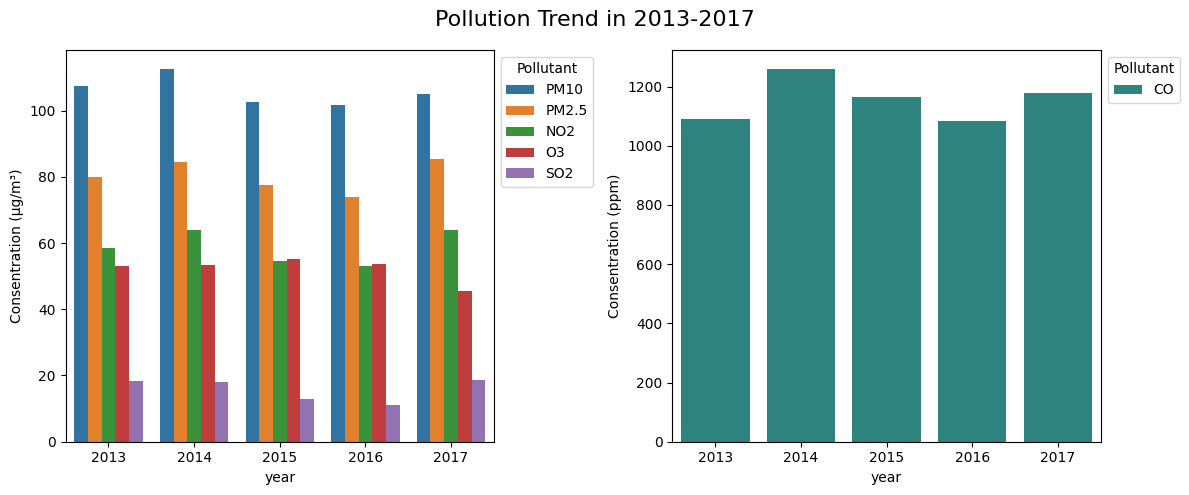

In [44]:
fig , axes = plt.subplots(1,2, figsize=(12,5))

data_melted_PPB = pd.melt(data, id_vars=['year'], value_vars=['PM2.5', 'PM10' , 'SO2' , 'O3' , 'NO2'] , var_name='Pollutant', value_name='Consentration (µg/m³)')
data_melted_PPM = pd.melt(data, id_vars=['year'], value_vars=['CO'] , var_name='Pollutant', value_name='Consentration (ppm)')


data_melted_PPB_mean = data_melted_PPB.groupby(['year' , 'Pollutant'])['Consentration (µg/m³)'].mean().reset_index().sort_values(by="Consentration (µg/m³)", ascending=False)
data_melted_PPM_mean = data_melted_PPM.groupby(['year' , 'Pollutant'])['Consentration (ppm)'].mean().reset_index().sort_values(by="Consentration (ppm)", ascending=False)

sns.barplot(data=data_melted_PPB_mean , x='year' , y='Consentration (µg/m³)' , hue='Pollutant', ax=axes[0])
sns.barplot(data=data_melted_PPM_mean , x='year' , y='Consentration (ppm)' , hue='Pollutant', ax=axes[1] , palette="viridis")

axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1),title="Pollutant")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1),title="Pollutant")

fig.suptitle("Pollution Trend in 2013-2017", fontsize=16)
fig.tight_layout()
plt.show()

### Pertanyaan 2:

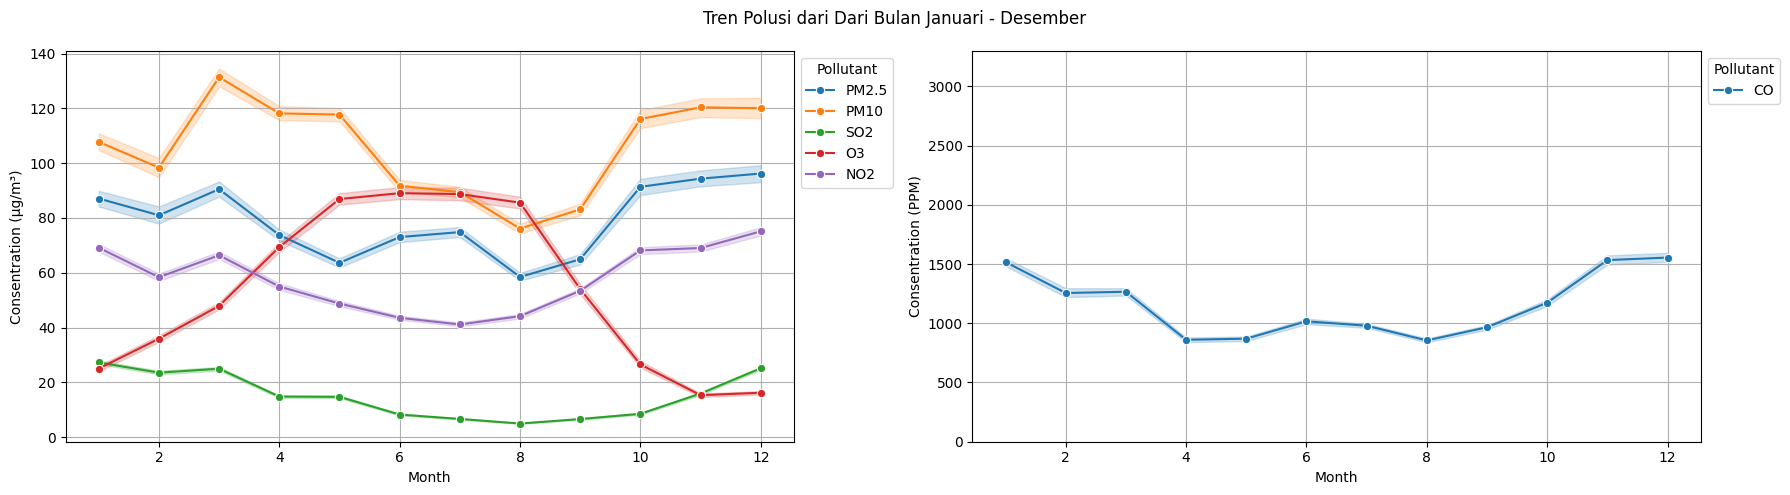

In [45]:
fig, axes = plt.subplots(1,2,figsize=(18, 5))

data_filtered = data[(data['month'] >= 1)]


sns.lineplot(data=data_filtered , x='month', y= 'PM2.5' ,ax = axes[0] , marker="o", label='PM2.5')
sns.lineplot(data=data_filtered , x='month', y= 'PM10' ,ax = axes[0] , marker="o", label='PM10')
sns.lineplot(data=data_filtered , x='month', y= 'SO2' ,ax = axes[0] , marker="o", label='SO2')
sns.lineplot(data=data_filtered , x='month', y= 'O3' ,ax = axes[0] , marker="o", label='O3')
sns.lineplot(data=data_filtered , x='month', y= 'NO2' ,ax = axes[0] , marker="o", label='NO2')
sns.lineplot(data=data_filtered , x='month', y= 'CO' ,ax = axes[1] , marker="o", label='CO')

fig.suptitle('Tren Polusi dari Dari Bulan Januari - Desember')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Consentration (µg/m³)')

axes[1].set_xlabel('Month')
axes[1].set_ylabel('Consentration (PPM)')

axes[0].grid(True)
axes[1].grid(True)

axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1),title="Pollutant")
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1),title="Pollutant")

axes[1].set_ylim(0, data_filtered['CO'].max() * 1.1)

plt.tight_layout()
plt.subplots_adjust(hspace=2.0)
plt.show()

### Pertanyaan 3:

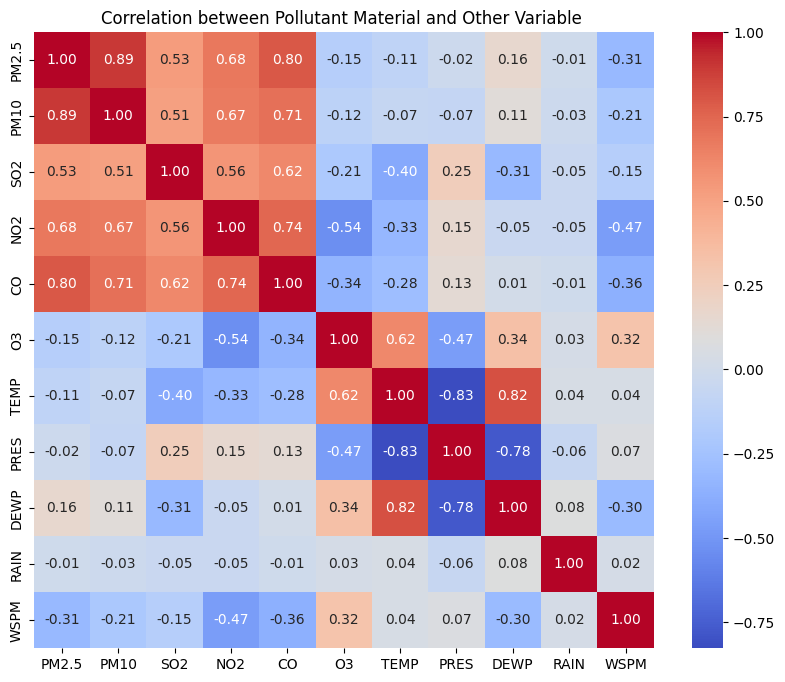

In [46]:
corr_matrix = data[['PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Pollutant Material and Other Variable ')
plt.show()

**Insight:**
- Visualisasi dari data polutan untuk tren dari polusi di kota guangyuang digambarkan menggunakan clustered bar chart agar dapat melihat distribusi dari besaran konsentrasi dari berbagai polutan secara jelas dan mudah untuk dibandingkan satu sama lain, namun ada pengecualian untuk polutan CO (karbon monoksida) dikarenakan polutan tersebut diukur dengan satuan yang berbeda serta untuk menghindari kejomplangan dalam visualisasi data saat menggunakan plot.

- Nilai yang digunakan untuk memplot clustered bar chart adalah mean dari konsentrasi polutan per tahun.

- Visualisasi dari data polutan untuk tren dari polusi di kota guangyuang digambarkan menggunakan line chart agar dapat melihat naik turunnya besaran konsentrasi dari berbagai polutan secara jelas dan mudah untuk dibandingkan satu sama lain, namun ada pengecualian untuk polutan CO (karbon monoksida) dikarenakan polutan tersebut diukur dengan satuan yang berbeda serta untuk menghindari kejomplangan dalam visualisasi data saat menggunakan plot.

- Nilai yang digunakan untuk memplot line chart adalah mean dari besaran konsentrasi polutan satu bulan dari rentang 2013 - 2017.

## Analisis Lanjutan (Opsional)

In [57]:
bins_pm25 = np.array([0.0, 50.0, 100.0, 150.0, 200.0, np.inf], dtype=float)
bins_pm10 = np.array([0.0, 50.0, 100.0, 150.0, 200.0, np.inf], dtype=float)
bins_so2 = np.array([0.0, 50.0, 100.0, 150.0, 200.0, np.inf], dtype=float)
bins_o3 = np.array([0.0, 50.0, 100.0, 150.0, 200.0, np.inf], dtype=float)
bins_no2 = np.array([0.0, 50.0, 100.0, 150.0, 200.0, np.inf], dtype=float)
bins_co = np.array([0.0, 9.0, 35.0, 149.0, 400.0, np.inf], dtype=float)


labels = np.array(['Rendah', 'Menengah', 'Tinggi', 'Sangat Tinggi', 'Ekstrim'])

data['PM2.5_binned'] = pd.cut(data['PM2.5'], bins=bins_pm25, labels=labels, include_lowest=True)
data['PM10_binned'] = pd.cut(data['PM10'], bins=bins_pm10, labels=labels, include_lowest=True)
data['SO2_binned'] = pd.cut(data['SO2'], bins=bins_so2, labels=labels, include_lowest=True)
data['O3_binned'] = pd.cut(data['O3'], bins=bins_o3, labels=labels, include_lowest=True)
data['NO2_binned'] = pd.cut(data['NO2'], bins=bins_no2, labels=labels, include_lowest=True)
data['CO_binned'] = pd.cut(data['CO'], bins=bins_co, labels=labels, include_lowest=True)

print(data[['PM2.5_binned', 'PM10_binned', 'SO2_binned', 'O3_binned', 'NO2_binned', 'CO_binned']].apply(pd.value_counts))
print(data[['PM2.5', 'PM10', 'SO2', 'O3', 'NO2', 'CO']].describe())


               PM2.5_binned  PM10_binned  SO2_binned  O3_binned  NO2_binned  \
Rendah                15760        10848       32002      20213       17210   
Menengah               8863         8672        3062       8766       13531   
Tinggi                 4931         6895           0       3224        4323   
Sangat Tinggi          2507         3917           0       2861           0   
Ekstrim                3003         4732           0          0           0   

               CO_binned  
Rendah                 0  
Menengah               0  
Tinggi               521  
Sangat Tinggi       6066  
Ekstrim            28477  
              PM2.5          PM10           SO2            O3           NO2  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      79.107128    105.948415     15.090502     53.476198     57.700372   
std       68.347891     80.171291     15.553556     53.171016     33.814529   
min        2.000000      2.000000      1.000000

<ipython-input-57-8f0f103beea1>:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(data[['PM2.5_binned', 'PM10_binned', 'SO2_binned', 'O3_binned', 'NO2_binned', 'CO_binned']].apply(pd.value_counts))
<ipython-input-57-8f0f103beea1>:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(data[['PM2.5_binned', 'PM10_binned', 'SO2_binned', 'O3_binned', 'NO2_binned', 'CO_binned']].apply(pd.value_counts))
<ipython-input-57-8f0f103beea1>:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(data[['PM2.5_binned', 'PM10_binned', 'SO2_binned', 'O3_binned', 'NO2_binned', 'CO_binned']].apply(pd.value_counts))
<ipython-input-57-8f0f103beea1>:18: FutureWarning: pandas.value_counts is deprecated and will be removed in a future vers

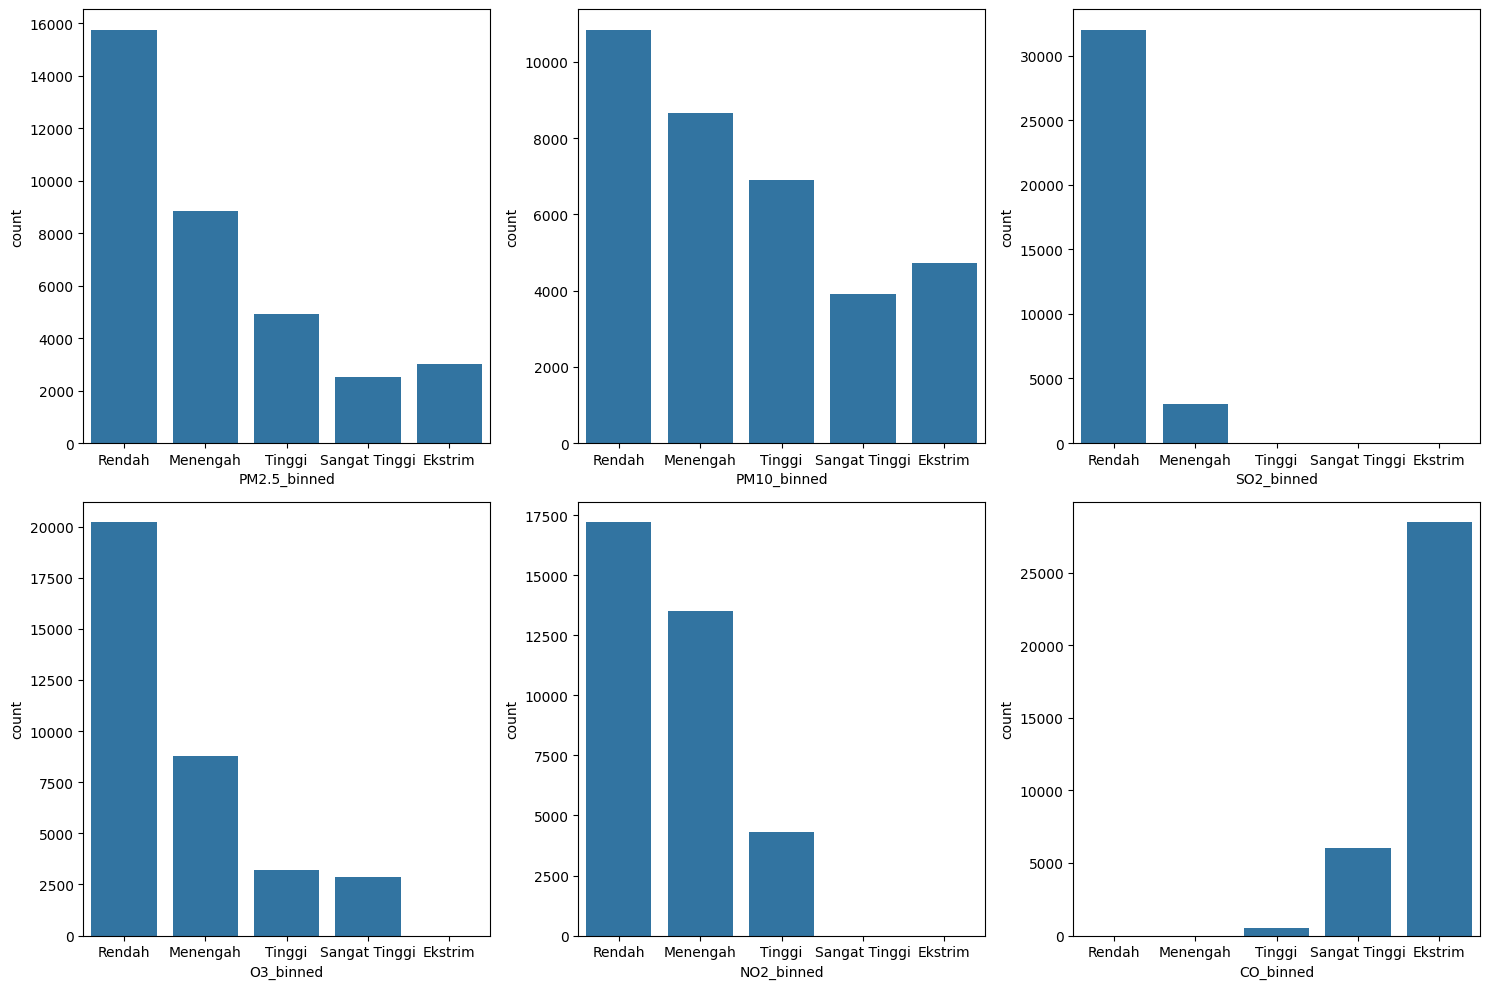

In [53]:
fig , axes = plt.subplots(2,3, figsize=(15,10))

sns.countplot(data=data, x='PM2.5_binned', ax=axes[0, 0])
sns.countplot(data=data, x='PM10_binned', ax=axes[0, 1])
sns.countplot(data=data, x='SO2_binned', ax=axes[0, 2])
sns.countplot(data=data, x='O3_binned', ax=axes[1, 0])
sns.countplot(data=data, x='NO2_binned', ax=axes[1, 1])
sns.countplot(data=data, x='CO_binned', ax=axes[1, 2])
plt.tight_layout()

## Conclusion

- Polusi udara tetap tinggi sepanjang tahun, terutama untuk PM10 dan PM2.5.

- CO memiliki tren berbeda, dengan lonjakan signifikan di akhir tahun.

- Polusi bulanan menunjukkan pola musiman, kemungkinan dipengaruhi oleh cuaca atau aktivitas manusia.

- Sebagian besar polutan berada dalam kategori rendah-menengah, kecuali CO, yang dominan dalam kategori ekstrem.

- Polutan partikulat (PM2.5 dan PM10) tetap menjadi ancaman utama, dengan distribusi yang luas.

- CO menunjukkan tren yang berbeda, dengan rentang nilai yang jauh lebih besar, menunjukkan potensi sumber pencemaran yang berbeda atau lebih intens.

In [58]:
data.to_csv("data_cleaned.csv", index=False)